### **Assignment-3**

**Title: Learn Probability Density Functions using Roll-Number-Parameterized Non-Linear Model**

---



In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
path='/content/drive/MyDrive/predictive-analysis/data.csv'

In [43]:
import numpy as np
import pandas as pd

In [44]:
pd.read_csv(path,encoding='latin1')

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data=pd.read_csv(path,encoding='latin1')['no2']

In [46]:
print(data)

0         17.4
1          7.0
2         28.5
3         14.7
4          7.5
          ... 
435737    50.0
435738    46.0
435739     NaN
435740     NaN
435741     NaN
Name: no2, Length: 435742, dtype: float64


In [47]:
print(data.size)
print(data.isna().sum())

435742
16233


this shows that out of 435742 values 16233 are NaN values.

In [48]:
x=data.dropna()

In [49]:
print(x.size)

419509


In [50]:
#z = Tr(x) = x + arsin(brx)
r=102317096
a_r=0.05*(r%7)
b_r=0.3*(r%5+1)

print(a_r)
print(b_r)

0.0
0.6


In [51]:
z=x+a_r*(np.sin(b_r*x))
print(z)

0         17.4
1          7.0
2         28.5
3         14.7
4          7.5
          ... 
435734    44.0
435735    44.0
435736    45.0
435737    50.0
435738    46.0
Name: no2, Length: 419509, dtype: float64


In [52]:
from scipy.optimize import curve_fit

def p(z, c, l, m):
    e = -l * (z - m)**2
    e = np.clip(e, -700, 700)
    return c * np.exp(e)

zf = z[z < 100]
h, be = np.histogram(zf, bins=50, density=True)
bc = (be[:-1] + be[1:]) / 2

ig = [0.03, 0.01, np.mean(zf)]
pr, _ = curve_fit(p, bc, h, p0=ig, maxfev=10000)

c, lam, mu = pr

print("c =", c)
print("λ =", lam)
print("μ =", mu)

c = 0.03216973351039098
λ = 0.0034141521200784916
μ = 20.048268388588276


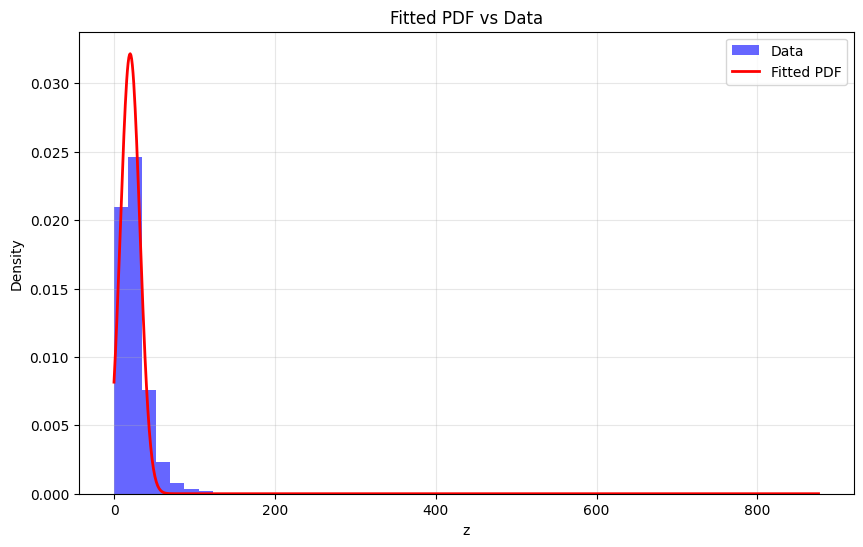

c = 0.032170
λ = 0.003414
μ = 20.048268


In [53]:
import matplotlib.pyplot as plt

zr = np.linspace(z.min(), z.max(), 1000)
fp = c * np.exp(-lam * (zr - mu)**2)

plt.figure(figsize=(10, 6))
plt.hist(z, bins=50, density=True, alpha=0.6, color='blue', label='Data')
plt.plot(zr, fp, 'r-', linewidth=2, label='Fitted PDF')
plt.xlabel('z')
plt.ylabel('Density')
plt.title('Fitted PDF vs Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"c = {c:.6f}")
print(f"λ = {lam:.6f}")
print(f"μ = {mu:.6f}")